In [253]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [269]:
# Define class for classification tree
class c_tree:
    def __init__(self, data=None, k=0, level=0):
        self.level = level
        self.data = data
        self.children = {}
        self.k = k
        self.value_num = 2
        self.__max_level = 2
        self.select_i = -1
        if self.level >= self.__max_level: return
        self.select_i = self.split_attribute()
        att_i = self.data.iloc[:, self.select_i]
        for att in set(att_i):
            Xi = self.data.groupby(att_i).get_group(att)
            new_tree = c_tree(data=Xi, k=self.k, level=self.level+1)
            self.children[att] = new_tree
            
    def nlogn(self, x):
        if x > 0: return x * np.log2(x)
        else: return 0
    
#     def cal_node_entropy(self):
#         N = len(self.data)
#         Nm = collections.Counter(self.data.value)
#         res = 0
#         for i in Nm:
#             p = Nm[i] / N
#             res -= self.nlogn(p)
            
#         return res
    
    def cal_split_entropy(self, m):
        Nmji = [[0 for _ in range(self.k)] for __ in range(self.value_num)]
        Nmj = [0] * self.k
        Nm = len(self.data)
        for feature, value in zip(self.data.iloc[:, m], self.data.iloc[:, -1]):
            Nmji[value][feature-1] += 1
            Nmj[feature-1] += 1
            
        N_temp = [sum(self.nlogn(Nmji[i][j] / Nmj[j]) if Nmj[j] > 0 else 0 for i in range(self.value_num)) for j in range(self.k)]
        return -sum(Nmj[j] * N_temp[j] / Nm for j in range(self.k))
    
    def split_attribute(self):
        MinEnt = float('Inf')
        e = 0
        bestf = 0
        for i in range(len(self.data.columns)-1):
            e = self.cal_split_entropy(i)
            if e < MinEnt:
                MinEnt, bestf = e, i
        return bestf
    
    def predict(self, new_data):
        # Assume new_data is pandas dataframe with only one row
        if self.select_i >= 0 and new_data[self.select_i] in self.children:
            return self.children[new_data[self.select_i]].predict(new_data)
        else:
            c = collections.Counter(self.data.iloc[:, -1])
            res, curr_max = 0, -1
            for i in c:
                if c[i] > curr_max: res, curr_max = i, c[i]
            return res


              PredPostive  PredNegative
TestPostive           100             0
TestNegative            0           100
synthetic-1.csv accuracy rate is  100.0 % with 2 bins


In [296]:
#preprocess
def split(train_data,k):
    for i in range(len(train_data.columns) - 1):
        max_n = max(train_data.iloc[:, i]) + 1e-6
        min_n = min(train_data.iloc[:, i])
        dis=(max_n-min_n)/k
        f_1=[min_n] 
        for _ in range(k):
            f_1.append(f_1[-1]+dis)  
        train_data.iloc[:, i]=np.digitize(train_data.iloc[:, i],f_1)
def test(filename,k):
    train_data_m = pd.read_csv(filename, header=None)
    split(train_data_m,k)
    #call function
    Tree = c_tree(train_data_m, k, 0)
    #Test--build confusion matrix
    test_data_m = train_data_m.copy()
    cont = [[0, 0], [0, 0]]
    for i in range(200):
        label, pred = test_data_m.iloc[i, 2], Tree.predict(test_data_m.iloc[i, 0:2])
        cont[label][pred] += 1
    y=pd.DataFrame(cont)
    y.columns =['PredPostive', 'PredNegative'] 
    y.index = ['TestPostive', 'TestNegative']
    print(y)
    correct=(y.iloc[0,0]+y.iloc[1,1])/200
    print(filename,"accuracy rate is ",correct*100,"%", "with", k ,"bins")

In [297]:
test("synthetic-1.csv" ,2)

              PredPostive  PredNegative
TestPostive           100             0
TestNegative            0           100
synthetic-1.csv accuracy rate is  100.0 % with 2 bins


In [311]:
def main():
    testlist=["synthetic-1.csv" ,"synthetic-2.csv","synthetic-3.csv","synthetic-4.csv"]
    parameter=[2,10,9,10]
    for i in range(4):
        print("Best restult reach: Divide",testlist[i],"into", parameter[i],"bins")
        test(testlist[i],parameter[i])
        print('\n','\n')
main()


Best restult reach: Divide synthetic-1.csv into 2 bins
              PredPostive  PredNegative
TestPostive           100             0
TestNegative            0           100
synthetic-1.csv accuracy rate is  100.0 % with 2 bins

 

Best restult reach: Divide synthetic-2.csv into 10 bins
              PredPostive  PredNegative
TestPostive            98             2
TestNegative            2            98
synthetic-2.csv accuracy rate is  98.0 % with 10 bins

 

Best restult reach: Divide synthetic-3.csv into 9 bins
              PredPostive  PredNegative
TestPostive            89            11
TestNegative            6            94
synthetic-3.csv accuracy rate is  91.5 % with 9 bins

 

Best restult reach: Divide synthetic-4.csv into 10 bins
              PredPostive  PredNegative
TestPostive            95             5
TestNegative            1            99
synthetic-4.csv accuracy rate is  97.0 % with 10 bins

 



In [262]:
#visulization
dummy = []
filename="synthetic-1.csv" 
k=2
train_data_m = pd.read_csv(filename, header=None)
#preprocess
def split(train_data,k):
    for i in range(len(train_data.columns) - 1):
        max_n = max(train_data.iloc[:, i]) + 1e-6
        min_n = min(train_data.iloc[:, i])
        dis=(max_n-min_n)/k
        f_1=[min_n] 
        for _ in range(k):
            f_1.append(f_1[-1]+dis)  
        train_data.iloc[:, i]=np.digitize(train_data.iloc[:, i],f_1)
split(train_data_m,k)

#call function
Tree = c_tree(train_data_m, k, 0)
#Test--build confusion matrix
test_data_m = train_data_m.copy()
cont = [[0, 0], [0, 0]]
for i in range(200):
    label, pred = test_data_m.iloc[i, 2], Tree.predict(test_data_m.iloc[i, 0:2])
    cont[label][pred] += 1
y=pd.DataFrame(cont)
y.columns =['PredPostive', 'PredNegative'] 
y.index = ['TestPostive', 'TestNegative']
print(y)
correct=(y.iloc[0,0]+y.iloc[1,1])/200
print(filename,"accuracy rate is ",correct*100,"%", "with", k ,"bins")


dummy = []
for i in range(1, k+1):
    for j in range(1, k+1):
        dummy.append([i, j])
dummy_pd = pd.DataFrame(dummy)
preds = []
for i in range(len(dummy_pd)):
    preds.append(Tree.predict(dummy_pd.iloc[i, 0:2]))
for row, pred in zip(dummy, preds):
    row.append(pred)
c_index= pd.DataFrame(dummy)
c_index.columns =['x', 'y','descision']

In [263]:
train_data = pd.read_csv(filename, header=None)
max_n = max(train_data.iloc[:, 0]) +1e-6
min_n = min(train_data.iloc[:, 0])
dis_1=(max_n-min_n)/k
f_1=[min_n] 
for _ in range(k):
    f_1.append(f_1[-1]+dis_1) 

max_m = max(train_data.iloc[:, 1])+1e-6
min_m = min(train_data.iloc[:, 1])
dis_2=(max_m-min_m)/k
f_2=[min_m] 
for _ in range(k):
    f_2.append(f_2[-1]+dis_2)  

In [264]:
spli=[f_1,f_2]
sp=pd.DataFrame(spli)
sp=sp.T
sp.columns=['x','y']


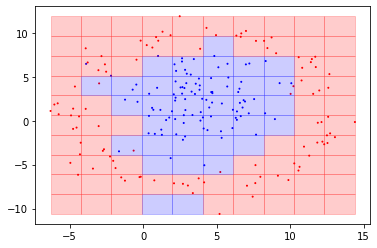

In [265]:
train_data_plot = pd.read_csv(filename, header=None) 
train_data = train_data_plot
plt.scatter(train_data.iloc[:,0], train_data.iloc[:,1], train_data.iloc[:,2]==0, c="red")
plt.scatter(train_data.iloc[:,0], train_data.iloc[:,1], train_data.iloc[:,2]==1, c="b")
for i in range(k*k):
    xi=c_index.x.iloc[i]
    yi = c_index.y.iloc[i]
    left, bottom, width, height = sp.x.iloc[xi-1], sp.y.iloc[yi-1], dis_1,dis_2
    if(c_index.descision.iloc[i]==1):
        rect=mpatches.Rectangle((left,bottom),width,height,linewidth=1, edgecolor='b', alpha=0.2, facecolor="b")
        plt.gca().add_patch(rect)
    if(c_index.descision.iloc[i]==0):
        rect=mpatches.Rectangle((left,bottom),width,height,linewidth=1, edgecolor='r', alpha=0.2, facecolor="red")
        plt.gca().add_patch(rect)

In [ ]:
plt.savefig("sy_3.png")